In [54]:
import pandas as pd
from pandas import DataFrame
import nltk
from nltk import FreqDist
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

import pickle 

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shuotian/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [94]:
df = pd.read_csv('Cannabis_reviews.csv')

In [6]:
df.head()

,review_id,username,text,review_added,rating,star_image,location_slug,location_name,avatar,log_rating,...,tags,negative_effects,flavors,symptoms,conditions,kiosk_curated_list_scores,permalink,sort_name,log_tags,created_at.1
0,1264200,hardknoxxlif3,fire get it why it's hot,2016-04-23 03:36:25+00,5,https://d3ix816x6wuc0d.cloudfront.net/stars/5/240,NaN,NaN,https://ddd33q3967xhi.cloudfront.net/_LwUSia9O...,"{""score"": 1, ""upVotes"": 1, ""downVotes"": 0}",...,"[{""Id"": ""LogTags-creative"", ""Name"": ""Creative""...","[{""Id"": ""LogTags-dizzy"", ""Name"": ""Dizzy"", ""Act...","[{""Id"": ""LogTags-sweet"", ""Name"": ""Sweet"", ""Act...","[{""Id"": ""LogTags-depression"", ""Name"": ""Depress...","[{""Id"": ""LogTags-addadhd"", ""Name"": ""ADD/ADHD"",...","{""berry-burst"": 0.0, ""diesel-fuel"": 15.6058249...",https://mobileapi.leafly.com/hybrid/707-headband,707 Headband,"{creative,euphoric,happy,relaxed,uplifted,dizz...",2019-10-10 03:54:37+00
1,2200248,BrazilianRedneck870,Extremely relaxing. Good head space. Does well...,2019-10-27 17:20:30+00,4,https://d3ix816x6wuc0d.cloudfront.net/stars/4/240,NaN,NaN,https://ddd33q3967xhi.cloudfront.net/mB7zjHN07...,"{""score"": 0, ""upVotes"": 0, ""downVotes"": 0}",...,"[{""Id"": ""LogTags-euphoric"", ""Name"": ""Euphoric""...","[{""Id"": ""LogTags-dizzy"", ""Name"": ""Dizzy"", ""Act...","[{""Id"": ""LogTags-sweet"", ""Name"": ""Sweet"", ""Act...","[{""Id"": ""LogTags-depression"", ""Name"": ""Depress...","[{""Id"": ""LogTags-addadhd"", ""Name"": ""ADD/ADHD"",...","{""berry-burst"": 13.323500491642084, ""diesel-fu...",https://mobileapi.leafly.com/indica/3x-crazy,3X Crazy,"{euphoric,happy,relaxed,sleepy,tingly,dizzy,dr...",2019-10-10 03:54:37+00
2,1261599,dubabud,"I really like the taste of this strain, great ...",2016-04-21 20:42:57+00,5,https://d3ix816x6wuc0d.cloudfront.net/stars/5/240,NaN,NaN,https://ddd33q3967xhi.cloudfront.net/zL9jSVD3k...,"{""score"": 0, ""upVotes"": 0, ""downVotes"": 0}",...,"[{""Id"": ""LogTags-creative"", ""Name"": ""Creative""...","[{""Id"": ""LogTags-dizzy"", ""Name"": ""Dizzy"", ""Act...","[{""Id"": ""LogTags-sweet"", ""Name"": ""Sweet"", ""Act...","[{""Id"": ""LogTags-depression"", ""Name"": ""Depress...","[{""Id"": ""LogTags-addadhd"", ""Name"": ""ADD/ADHD"",...","{""berry-burst"": 0.0, ""diesel-fuel"": 15.6058249...",https://mobileapi.leafly.com/hybrid/707-headband,707 Headband,"{creative,euphoric,happy,relaxed,uplifted,dizz...",2019-10-10 03:54:37+00
3,2185133,Blazedmexican,Great flavor takes me back to when I first smo...,2019-10-11 19:30:43+00,5,https://d3ix816x6wuc0d.cloudfront.net/stars/5/240,NaN,NaN,https://ddd33q3967xhi.cloudfront.net/38RRmfxAf...,"{""score"": 0, ""upVotes"": 0, ""downVotes"": 0}",...,"[{""Id"": ""LogTags-euphoric"", ""Name"": ""Euphoric""...","[{""Id"": ""LogTags-dizzy"", ""Name"": ""Dizzy"", ""Act...","[{""Id"": ""LogTags-sweet"", ""Name"": ""Sweet"", ""Act...","[{""Id"": ""LogTags-depression"", ""Name"": ""Depress...","[{""Id"": ""LogTags-addadhd"", ""Name"": ""ADD/ADHD"",...","{""berry-burst"": 13.323500491642084, ""diesel-fu...",https://mobileapi.leafly.com/indica/3x-crazy,3X Crazy,"{euphoric,happy,relaxed,sleepy,tingly,dizzy,dr...",2019-10-10 03:54:37+00
4,2165833,fraser_patz,This 1 is dankkk\nMy favourite strain at the m...,2019-09-24 21:50:19+00,5,https://d3ix816x6wuc0d.cloudfront.net/stars/5/240,NaN,NaN,https://ddd33q3967xhi.cloudfront.net/BZ1r09SF1...,"{""score"": 0, ""upVotes"": 0, ""downVotes"": 0}",...,"[{""Id"": ""LogTags-euphoric"", ""Name"": ""Euphoric""...","[{""Id"": ""LogTags-dizzy"", ""Name"": ""Dizzy"", ""Act...","[{""Id"": ""LogTags-sweet"", ""Name"": ""Sweet"", ""Act...","[{""Id"": ""LogTags-depression"", ""Name"": ""Depress...","[{""Id"": ""LogTags-addadhd"", ""Name"": ""ADD/ADHD"",...","{""berry-burst"": 13.323500491642084, ""diesel-fu...",https://mobileapi.leafly.com/indica/3x-crazy,3X Crazy,"{euphoric,happy,relaxed,sleepy,tingly,dizzy,dr...",2019-10-10 03:54:37+00


In [53]:
df.describe()

,review_id,rating,strain_id,strain_id.1,rating_count,review_count,rating.1
count,1.810570e+05,181057.000000,181057.000000,181057.000000,181057.00000,181057.000000,181057.000000
mean,1.371105e+06,4.365216,172634.602567,172634.602567,467.23185,452.636026,3.801203
std,2.450670e+05,0.956362,194696.124790,194696.124790,868.17066,843.174425,1.652124
min,1.057057e+06,0.000000,7.000000,7.000000,0.00000,0.000000,0.000000
25%,1.202276e+06,4.000000,930.000000,930.000000,6.00000,5.000000,4.248062
50%,1.302922e+06,5.000000,88047.000000,88047.000000,83.00000,73.000000,4.430000
75%,1.435627e+06,5.000000,281232.000000,281232.000000,596.00000,564.000000,4.609865
max,2.206799e+06,5.000000,504471.000000,504471.000000,4543.00000,4624.000000,5.000000


In [50]:
df.columns

Index(['review_id', 'username', 'text', 'review_added', 'rating', 'star_image',
       'location_slug', 'location_name', 'avatar', 'log_rating', 'strain_slug',
       'has_up_voted', 'has_down_voted', 'strain_id', 'created_at',
       'strain_id.1', 'url_name', 'name', 'category', 'display_category',
       'symbol', 'rating_count', 'review_count', 'rating.1', 'star_image.1',
       'cannabinoid_profile', 'tags', 'negative_effects', 'flavors',
       'symptoms', 'conditions', 'kiosk_curated_list_scores', 'permalink',
       'sort_name', 'log_tags', 'created_at.1', 'reviews'],
      dtype='object')

In [52]:
df.dtypes

review_id                      int64
username                      object
text                          object
review_added                  object
rating                         int64
star_image                    object
location_slug                 object
location_name                 object
avatar                        object
log_rating                    object
strain_slug                   object
has_up_voted                  object
has_down_voted                object
strain_id                      int64
created_at                    object
strain_id.1                    int64
url_name                      object
name                          object
category                      object
display_category              object
symbol                        object
rating_count                   int64
review_count                   int64
rating.1                     float64
star_image.1                  object
cannabinoid_profile           object
tags                          object
n

In [25]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

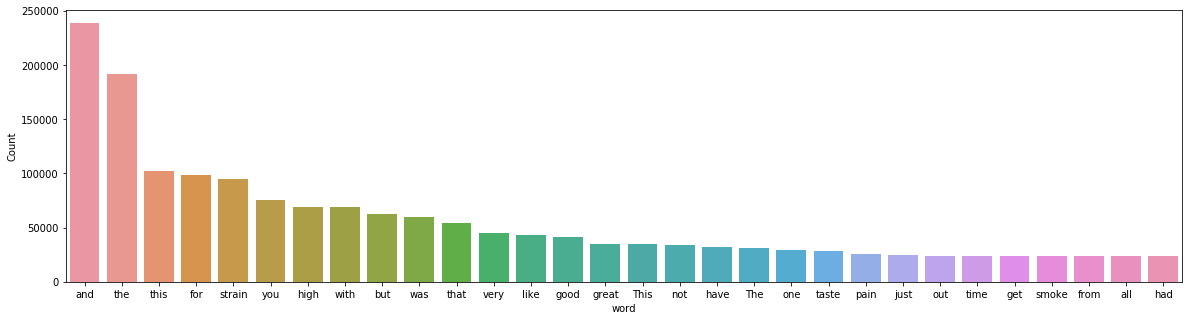

In [35]:
freq_words(df['text'])

In [30]:
# remove unwanted characters, numbers and symbols
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ").astype(str)

In [31]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [32]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['text']]

# remove short words (length < 3)
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

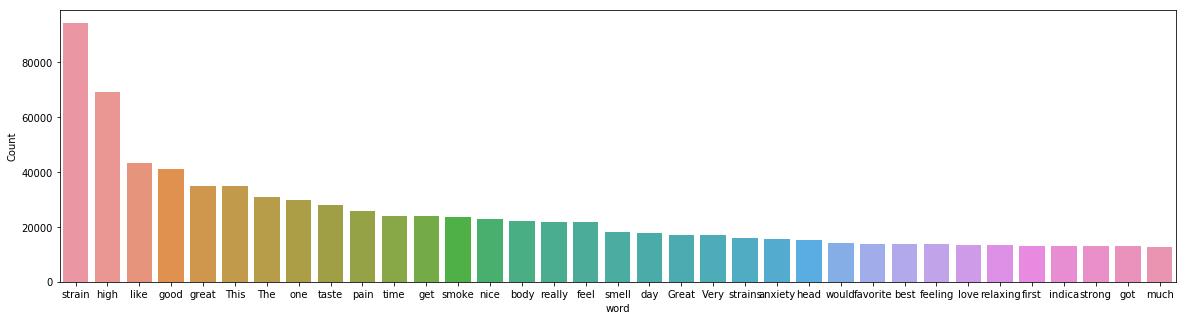

In [34]:
freq_words(reviews, 35)

In [37]:
!python -m spacy download en # one time run

    100% |████████████████████████████████| 11.1MB 29.7MB/s ta 0:00:01
  Running setup.py install for en-core-web-sm ... done
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [38]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [ ]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

In [39]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['Extremely', 'relaxing', 'Good', 'head', 'space', 'Does', 'well', 'remove', 'stress', 'pain']


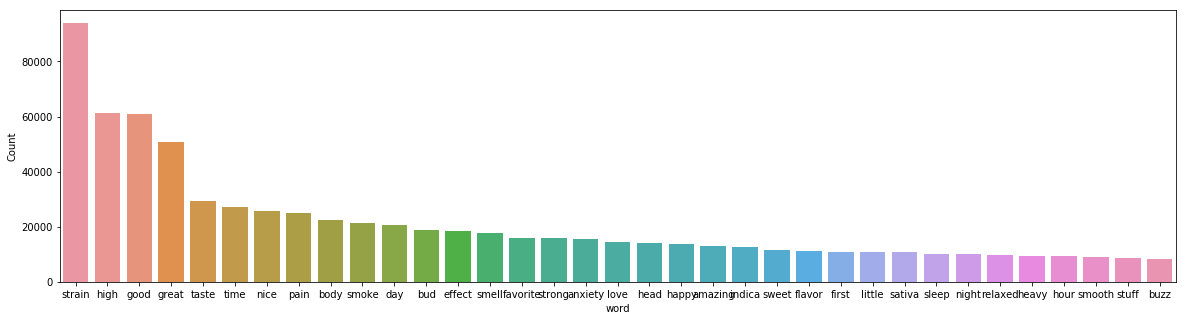

In [41]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

In [63]:
np.savetxt("reviews2.csv", reviews_2, delimiter=",",fmt='%s')
np.savetxt("reviews3.csv", reviews_3, delimiter=",",fmt='%s')

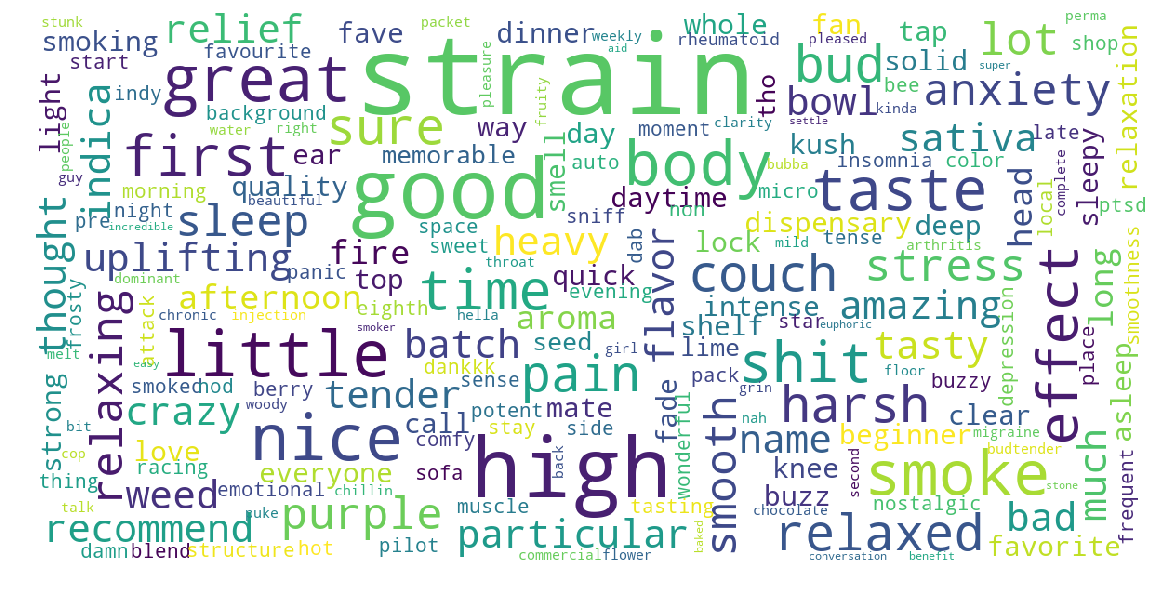

In [49]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["reviews"])

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/italy.png"))
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(ita)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/ita_wine.png", format="png")

#plt.show()

##  Built LDA on NN 

In [64]:
def lemmatizationN(texts, tags=['NOUN']): # filter noun
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [68]:
reviews_2N = lemmatizationN(tokenized_reviews)
print(reviews_2N[1]) # print lemmatized review

['head', 'space', 'stress', 'pain']


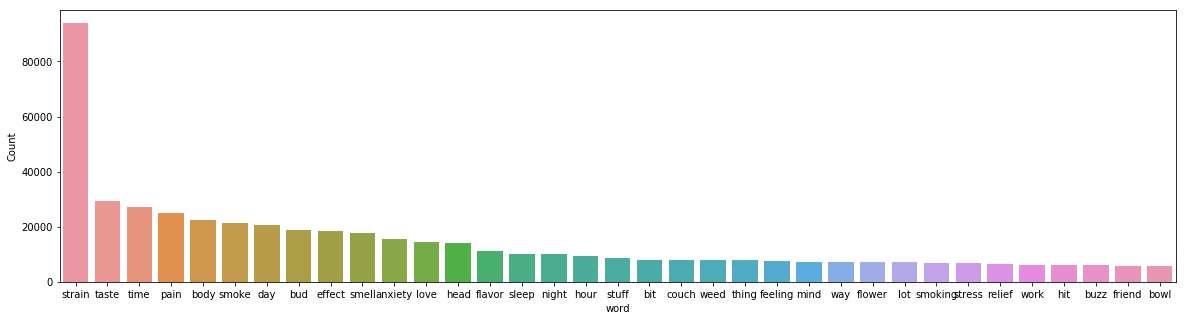

In [69]:
reviews_3N = []
for i in range(len(reviews_2N)):
    reviews_3N.append(' '.join(reviews_2N[i]))

df['reviewsN'] = reviews_3N

freq_words(df['reviewsN'], 35)

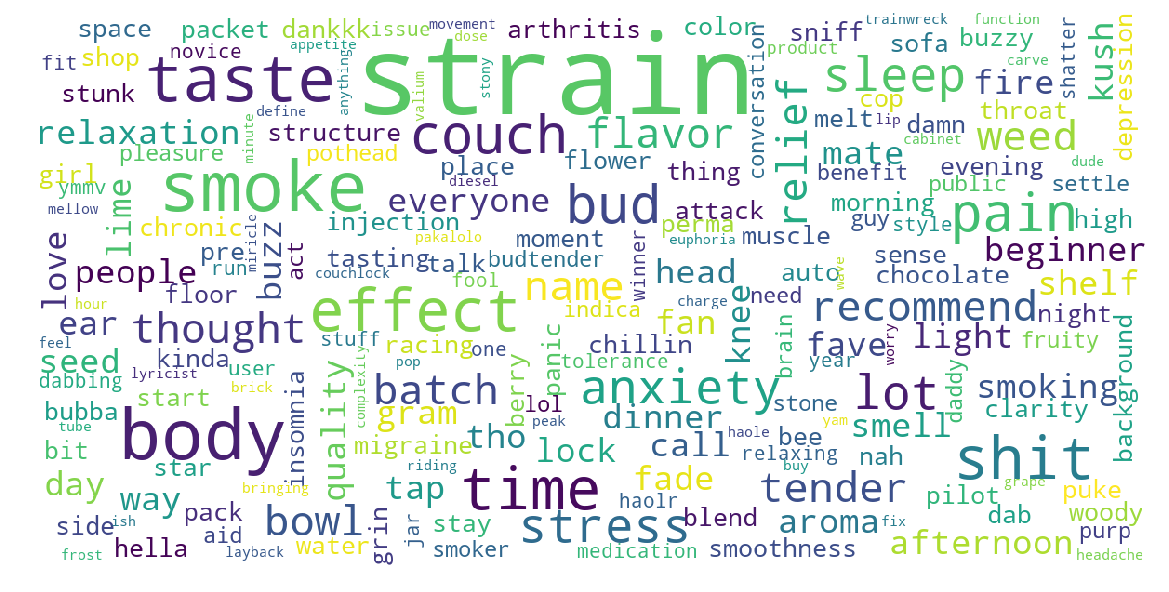

In [81]:
show_wordcloud(df["reviewsN"])

In [70]:
dictionaryN = corpora.Dictionary(reviews_2N)

In [76]:
doc_term_matrix_N = [dictionaryN.doc2bow(rev) for rev in reviews_2N]

In [77]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model on NN
lda_model_NN = LDA(corpus=doc_term_matrix_N, id2word=dictionaryN, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [78]:
lda_model_NN.print_topics()

[(0,
  '0.073*"strain" + 0.064*"effect" + 0.021*"indica" + 0.021*"body" + 0.015*"mind" + 0.014*"hybrid" + 0.012*"tolerance" + 0.012*"sativa" + 0.012*"vape" + 0.011*"smoker"'),
 (1,
  '0.129*"taste" + 0.076*"smell" + 0.066*"bud" + 0.053*"flavor" + 0.047*"strain" + 0.032*"smoke" + 0.026*"effect" + 0.024*"body" + 0.021*"buzz" + 0.020*"aroma"'),
 (2,
  '0.118*"strain" + 0.102*"pain" + 0.060*"anxiety" + 0.040*"body" + 0.029*"relief" + 0.027*"stress" + 0.023*"sleep" + 0.018*"relaxation" + 0.017*"depression" + 0.017*"day"'),
 (3,
  '0.033*"shit" + 0.023*"head" + 0.022*"hit" + 0.019*"diesel" + 0.014*"face" + 0.014*"piney" + 0.013*"ass" + 0.012*"game" + 0.012*"coffee" + 0.012*"relaxing"'),
 (4,
  '0.072*"strain" + 0.045*"love" + 0.026*"flower" + 0.023*"bud" + 0.021*"time" + 0.016*"mouth" + 0.015*"eye" + 0.014*"batch" + 0.012*"plant" + 0.011*"quality"'),
 (5,
  '0.071*"couch" + 0.070*"stuff" + 0.062*"weed" + 0.045*"sleep" + 0.041*"hour" + 0.031*"lock" + 0.020*"blueberry" + 0.019*"bowl" + 0.014*"

In [80]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_NN, doc_term_matrix_N, dictionaryN)
vis

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.061855 -0.112972       1        1  20.069868
2      0.148820 -0.074791       2        1  17.004248
1      0.162589  0.168203       3        1  15.358469
0      0.133539  0.005418       4        1  15.052221
4      0.102188 -0.030425       5        1  15.039621
5     -0.316781 -0.251463       6        1   8.795086
3     -0.292210  0.296029       7        1   8.680490, topic_info=     Category          Freq        Term         Total  loglift  logprob
8     Default  27846.000000       taste  27846.000000  30.0000  30.0000
2     Default  24363.000000        pain  24363.000000  29.0000  29.0000
37    Default  16488.000000       smell  16488.000000  28.0000  28.0000
14    Default  24545.000000        time  24545.000000  27.0000  27.0000
233   Default  14478.000000     anxiety  14478.000000  26.0000  26.0000
32    Default  19013.000000         bud  19013.000000  25.0000  25.0000
108   Default  19201.000000      effect  19201.000000  24.0000  24.0000
131   Default  19903.000000         day  19903.000000  23.0000  23.0000
11    Default  11530.000000      flavor  11530.000000  22.0000  22.0000
47    Default   8812.000000       couch   8812.000000  21.0000  21.0000
7     Default  93655.000000      strain  93655.000000  20.0000  20.0000
295   Default   8696.000000       stuff   8696.000000  19.0000  19.0000
13    Default  20339.000000       smoke  20339.000000  18.0000  18.0000
15    Default   7667.000000        weed   7667.000000  17.0000  17.0000
27    Default  11028.000000       sleep  11028.000000  16.0000  16.0000
36    Default  12398.000000        love  12398.000000  15.0000  15.0000
205   Default   9926.000000        hour   9926.000000  14.0000  14.0000
60    Default   6980.000000      relief   6980.000000  13.0000  13.0000
4     Default   6419.000000      stress   6419.000000  12.0000  12.0000
20    Default  24362.000000        body  24362.000000  11.0000  11.0000
100   Default   7475.000000      flower   7475.000000  10.0000  10.0000
26    Default   4065.000000        shit   4065.000000   9.0000   9.0000
23    Default  10740.000000       night  10740.000000   8.0000   8.0000
77    Default   3859.000000        lock   3859.000000   7.0000   7.0000
125   Default   4503.000000      indica   4503.000000   6.0000   6.0000
389   Default   6791.000000        buzz   6791.000000   5.0000   5.0000
740   Default   5160.000000      energy   5160.000000   4.0000   4.0000
9     Default   4352.000000       aroma   4352.000000   3.0000   3.0000
34    Default   4162.000000  depression   4162.000000   2.0000   2.0000
46    Default   5718.000000        bowl   5718.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
146    Topic7   1241.103149       cough   1241.944214   2.4434  -4.5900
412    Topic7   1156.701660       punch   1157.542358   2.4434  -4.6604
415    Topic7   1113.881470     genetic   1114.723511   2.4433  -4.6982
559    Topic7   1068.947021        trip   1069.787720   2.4433  -4.7393
1515   Topic7   1060.501343       cloud   1061.342041   2.4433  -4.7473
1009   Topic7   1042.018188        word   1042.859253   2.4433  -4.7648
265    Topic7    953.231018        rush    954.072083   2.4432  -4.8539
24     Topic7    891.406128        pack    892.246887   2.4431  -4.9210
880    Topic7    836.924927       enjoy    837.766235   2.4431  -4.9840
902    Topic7    827.111267        bong    827.951782   2.4431  -4.9958
1469   Topic7    826.886475        plan    827.729126   2.4431  -4.9961
537    Topic7    821.079773       smile    821.920105   2.4431  -5.0031
546    Topic7    804.776245        bomb    805.615967   2.4430  -5.0232
461    Topic7    804.951172     terpene    805.793823   2.4430  -5.0230
1024   Topic7    778.988892         rip    779.829590   2.4430  -5.0558
1499   Topic7    755.867126       video    756.707214   2.4430  -5.0859
221    Topic7  

In [138]:
pyLDAvis.save_html(vis, 'lda.html')

## Building an LDA model on NN and ADJ

In [42]:
dictionary = corpora.Dictionary(reviews_2)

In [43]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [44]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [45]:
lda_model.print_topics()

[(0,
  '0.095*"high" + 0.064*"body" + 0.045*"nice" + 0.043*"good" + 0.043*"head" + 0.025*"strong" + 0.022*"little" + 0.020*"buzz" + 0.016*"hour" + 0.015*"heavy"'),
 (1,
  '0.089*"good" + 0.046*"strain" + 0.040*"day" + 0.039*"time" + 0.032*"smoke" + 0.030*"night" + 0.027*"great" + 0.016*"stuff" + 0.016*"sleep" + 0.014*"shit"'),
 (2,
  '0.063*"pain" + 0.044*"strain" + 0.030*"anxiety" + 0.022*"great" + 0.018*"relief" + 0.018*"effect" + 0.017*"stress" + 0.016*"sleep" + 0.016*"good" + 0.011*"depression"'),
 (3,
  '0.061*"taste" + 0.042*"strain" + 0.036*"smell" + 0.034*"great" + 0.033*"high" + 0.028*"good" + 0.025*"flavor" + 0.025*"sweet" + 0.023*"nice" + 0.020*"effect"'),
 (4,
  '0.117*"bud" + 0.033*"green" + 0.031*"beautiful" + 0.028*"dense" + 0.021*"nug" + 0.021*"purple" + 0.021*"light" + 0.020*"orange" + 0.017*"hair" + 0.015*"plant"'),
 (5,
  '0.037*"strain" + 0.024*"time" + 0.021*"first" + 0.017*"top" + 0.015*"dispensary" + 0.014*"year" + 0.013*"review" + 0.012*"different" + 0.009*"many

In [55]:
# Save the trained model as a pickle string. 
lda_model_7tps = pickle.dumps(lda_model) 

In [46]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.085966  0.188444       1        1  19.452877
2      0.096036 -0.010242       2        1  17.472727
6      0.123664  0.046679       3        1  16.624071
0      0.067408  0.141439       4        1  14.281104
1      0.099824 -0.083213       5        1  12.590668
5     -0.001440 -0.331241       6        1  12.111105
4     -0.471457  0.048134       7        1   7.467443, topic_info=     Category          Freq       Term         Total  loglift  logprob
18    Default  60642.000000       high  60642.000000  30.0000  30.0000
45    Default  20137.000000        bud  20137.000000  29.0000  29.0000
12    Default  27303.000000      taste  27303.000000  28.0000  28.0000
4     Default  25275.000000       pain  25275.000000  27.0000  27.0000
2     Default  59060.000000       good  59060.000000  26.0000  26.0000
31    Default  24867.000000       body  24867.000000  25.0000  25.0000
60    Default  25339.000000       nice  25339.000000  24.0000  24.0000
11    Default  96322.000000     strain  96322.000000  23.0000  23.0000
3     Default  14117.000000       head  14117.000000  22.0000  22.0000
55    Default  16274.000000      smell  16274.000000  21.0000  21.0000
266   Default  12884.000000      happy  12884.000000  20.0000  20.0000
203   Default  20309.000000        day  20309.000000  19.0000  19.0000
24    Default  24741.000000       time  24741.000000  18.0000  18.0000
178   Default  14635.000000   favorite  14635.000000  17.0000  17.0000
22    Default  20084.000000      smoke  20084.000000  16.0000  16.0000
227   Default  16434.000000     strong  16434.000000  15.0000  15.0000
360   Default  15262.000000    anxiety  15262.000000  14.0000  14.0000
17    Default  11305.000000     flavor  11305.000000  13.0000  13.0000
42    Default  11034.000000      sweet  11034.000000  12.0000  12.0000
35    Default  10820.000000      night  10820.000000  11.0000  11.0000
53    Default  13396.000000       love  13396.000000  10.0000  10.0000
9     Default  48368.000000      great  48368.000000   9.0000   9.0000
286   Default   5624.000000      green   5624.000000   8.0000   8.0000
149   Default   5300.000000  beautiful   5300.000000   7.0000   7.0000
39    Default  11159.000000      sleep  11159.000000   6.0000   6.0000
165   Default  19087.000000     effect  19087.000000   5.0000   5.0000
101   Default   7241.000000     relief   7241.000000   4.0000   4.0000
712   Default   4748.000000      dense   4748.000000   3.0000   3.0000
412   Default   9200.000000       buzz   9200.000000   2.0000   2.0000
7     Default   6720.000000     stress   6720.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
590    Topic7   2867.931152       hair   2868.776855   2.5943  -4.0922
207    Topic7   2509.385010      plant   2510.232178   2.5943  -4.2257
462    Topic7   2468.393799     sticky   2469.240234   2.5943  -4.2422
285    Topic7   2337.326172       dark   2338.172119   2.5943  -4.2968
237    Topic7   2321.096924      lemon   2321.943604   2.5943  -4.3037
822    Topic7   2207.318848     diesel   2208.165527   2.5942  -4.3540
614    Topic7   2190.088623    crystal   2190.934570   2.5942  -4.3618
794    Topic7   2113.064697       sour   2113.911865   2.5942  -4.3976
89     Topic7   1722.811035      color   1723.657593   2.5941  -4.6018
875    Topic7   1571.088013      white   1571.934570   2.5941  -4.6940
1265   Topic7   1563.321045      spicy   1564.171509   2.5941  -4.6990
1304   Topic7   1373.376099     inhale   1374.224365   2.5940  -4.8285
1041   Topic7   1358.228271      skunk   1359.076416   2.5940  -4.8396
1610   Topic7   1347.363892      candy   1348.211426   2.5940  -4.8476
455    Topic7   1301.432373      fruit   1302.279297   2.5940  -4.8823
715    Topic7   1238.558716     fluffy   1239.404907   2.5939  -4.9318
1613   Topic7   1181.589233      grape   1182.436157   2.5939  

### Fuzzy Word Matching

In [156]:
s = reviews[1:2000]

# Convert list to string
listToStr = '. '.join([str(elem) for elem in s]) 

In [157]:
sentences=re.findall(r"([^.]*?pain[^.]*\.)",listToStr)

len(sentences)

sentences[1:6]

[' picked eighth local dispensary Love smell taste Does really well depression insomnia helps pain highly recommend potent strain.',
 ' Great strain late afternoon evening smoke great relaxing alleviating pain muscle relief.',
 ' Definitely pleased beautiful purple flower Super relaxing relieving chronic back pain perma grin ear ear All around pleasure smoke nice fruity flavor smooth even feel like taking hit Highly recommended.',
 ' got couple nice relaxing strain good sedative qualities works great keeping pain check The buds green dark purple beautiful TRICHOME structure scope The smell well smell awesome let leave Definitely worth trying market something give couchlock.',
 ' OPTIMUS PRIME Little Egypt prime strain first thing notice smoothness smoke none harsh throat burn also know hits start way day joint small bowl several hours delightful period without pain Over beware Couch Lock sleepiness follow inexperienced smokers oldies back pain help allow active live Can good bed time m

### Sentiment Analysis

In [151]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shuotian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [152]:
analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

Extremely relaxing Good head space Does well remove stress pain.- {'neg': 0.307, 'neu': 0.252, 'pos': 0.441, 'compound': 0.3962}
 picked eighth local dispensary Love smell taste Does really well depression insomnia helps pain highly recommend potent strain. {'neg': 0.276, 'neu': 0.347, 'pos': 0.378, 'compound': 0.5013}
 Great strain late afternoon evening smoke great relaxing alleviating pain muscle relief. {'neg': 0.18, 'neu': 0.24, 'pos': 0.58, 'compound': 0.9001}
 Definitely pleased beautiful purple flower Super relaxing relieving chronic back pain perma grin ear ear All around pleasure smoke nice fruity flavor smooth even feel like taking hit Highly recommended. {'neg': 0.06, 'neu': 0.33, 'pos': 0.61, 'compound': 0.9817}
 got couple nice relaxing strain good sedative qualities works great keeping pain check The buds green dark purple beautiful TRICHOME structure scope The smell well smell awesome let leave Definitely worth trying market something give couchlock. {'neg': 0.099, 'neu

 Good helping pain Tired lazy happy.----------------------------- {'neg': 0.497, 'neu': 0.0, 'pos': 0.503, 'compound': 0.0258}
 soon smoked took cramps like Pound Hammer The name fitting still aware physical pain felt detached Normally cramps leave begging mercy stuck bed day Thanks strain able celebrate birthday without feeling like dying The fact felt able day hours relaxing amazing Even better get munchies feel drowsy medicated Wouldn recommend someone seeking remedy lack appetite Though helped struggle get sleep one would probably want different strain major insomnia This strain great general body aches pains though ranging light relatively intense Probably strong enough extremely debilitating pain never found another Indica well suited needs This become regular medicine stash. {'neg': 0.19, 'neu': 0.525, 'pos': 0.285, 'compound': 0.9511}
 Was offered terrible menstrual pain headache fatigue bad abdominal cramps sharing blunt homies took hits nice wavy rest day Great mellow high re

In [154]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
def get_sentiment(sentences):
     return sid.polarity_scores(sentences)

In [155]:
sentiment = get_sentiment(sentences)
print(sentiment) 

AttributeError: 'list' object has no attribute 'encode'